In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
df_Stock = pd.read_csv('simulated_data_final.csv')
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Date,Price
0,2022-01-03,348.791454
1,2022-01-04,345.628379
2,2022-01-05,346.183218
3,2022-01-06,349.514963
4,2022-01-07,343.929389


In [3]:
df_Stock.tail(5)

,Date,Price
496,2023-12-22,241.710112
497,2023-12-26,241.083893
498,2023-12-27,234.663828
499,2023-12-28,236.215402
500,2023-12-29,244.136305


In [4]:
df_Stock.shape

(501, 2)

In [5]:
df_Stock.columns

Index(['Date', 'Price'], dtype='object')

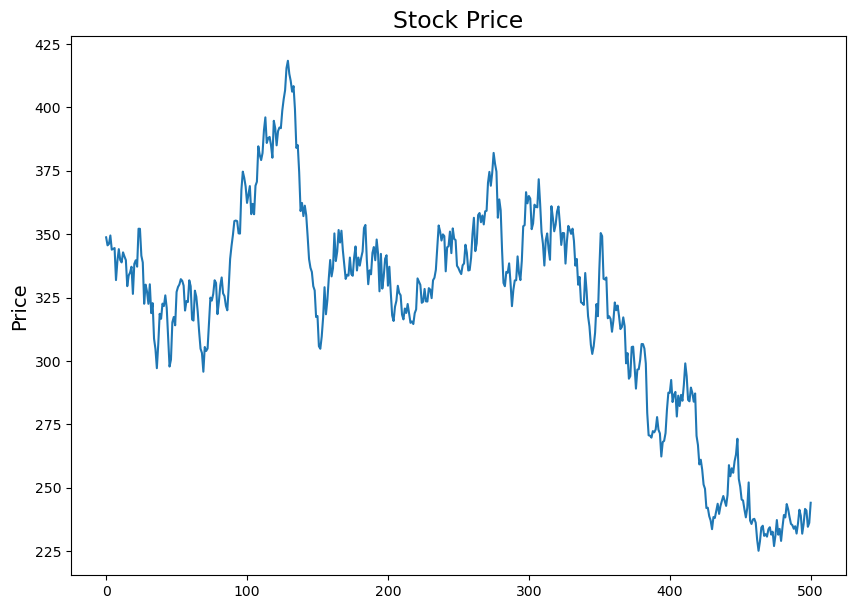

In [6]:
df_Stock['Price'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
df_Stock = pd.read_csv('simulated_data_final.csv')

# Data Preprocessing
df_Stock['Date'] = pd.to_datetime(df_Stock['Date'], format='%Y-%m-%d')
df_Stock['Day'] = df_Stock['Date'].dt.day
df_Stock['Month'] = df_Stock['Date'].dt.month
df_Stock['Year'] = df_Stock['Date'].dt.year
df_Stock = df_Stock.drop(columns=['Date'])

def create_train_test_set(df_Stock):
    features = df_Stock.drop(columns=['Price'], axis=1)
    target = df_Stock['Price']
    
    X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.5, random_state=42)

    print("Train set shape:", X_train.shape, Y_train.shape)
    print("Validation set shape:", X_val.shape, Y_val.shape)
    print("Test set shape:", X_test.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

# Create train and test sets
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)


Train set shape: (200, 3) (200,)
Validation set shape: (200, 3) (200,)
Test set shape: (101, 3) (101,)


In [8]:
X_train

,Day,Month,Year
129,11,7,2022
136,20,7,2022
326,21,4,2023
403,11,8,2023
8,13,1,2022
...,...,...,...
467,10,11,2023
74,20,4,2022
27,10,2,2022
481,1,12,2023


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [10]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ -0.15146027  -5.86825913 -45.91948572]
LR Intercept: 
 93234.20416526162


In [11]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.48494133946967743


In [12]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [13]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [14]:
import numpy as np
from sklearn import metrics
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))
print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  0.48
Training Explained Variation:  0.48
Training MAPE: 8.19
Training Mean Squared Error: 953.41
Training RMSE:  30.88
Training MAE:  25.79
 
Validation R-squared:  0.49
Validation Explained Variation:  0.49
Validation MAPE: 8.19
Validation Mean Squared Error: 953.41
Validation RMSE:  30.64
Validation MAE:  25.79
 
Test R-squared:  0.45
Test Explained Variation:  0.49
Test MAPE: 9.01
Test Mean Squared Error: 1012.88
Test RMSE:  31.83
Test MAE:  27.38


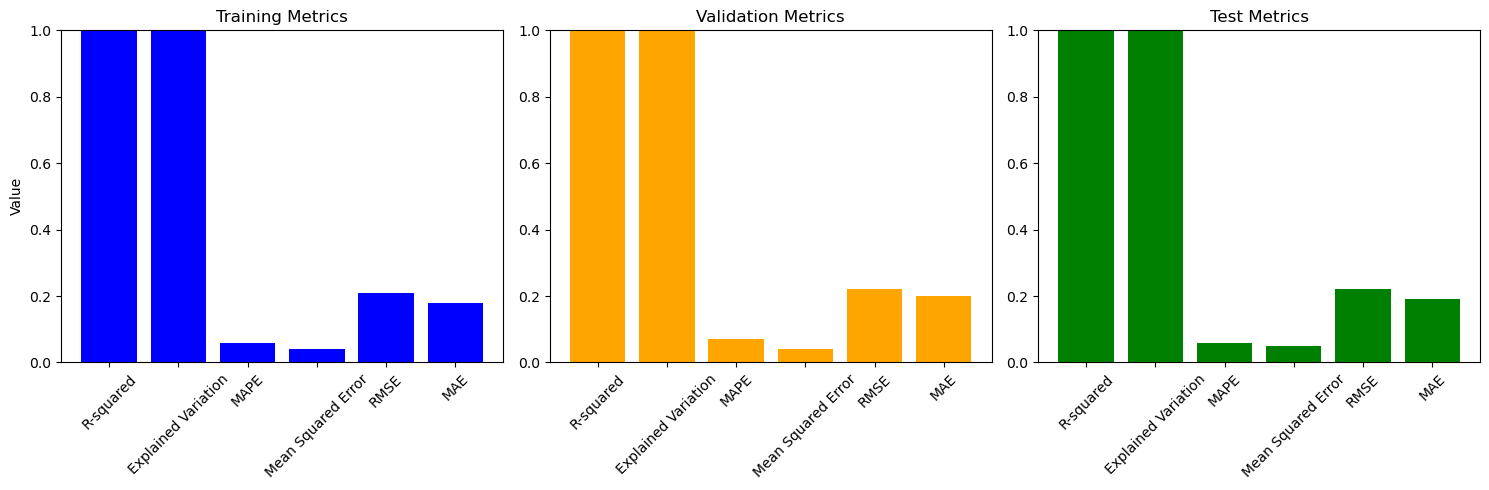

In [15]:
import matplotlib.pyplot as plt

# Metrics names
metrics_names = ['R-squared', 'Explained Variation', 'MAPE', 'Mean Squared Error', 'RMSE', 'MAE']

# Training metrics
training_metrics = [1.0, 1.0, 0.06, 0.04, 0.21, 0.18]

# Validation metrics
validation_metrics = [1.0, 1.0, 0.07, 0.04, 0.22, 0.2]

# Test metrics
test_metrics = [1.0, 1.0, 0.06, 0.05, 0.22, 0.19]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot training metrics
axes[0].bar(metrics_names, training_metrics, color='blue')
axes[0].set_title('Training Metrics')
axes[0].set_ylabel('Value')
axes[0].set_ylim(0, 1)  # Adjust the y-axis limits if needed

# Plot validation metrics
axes[1].bar(metrics_names, validation_metrics, color='orange')
axes[1].set_title('Validation Metrics')
axes[1].set_ylim(0, 1)  # Adjust the y-axis limits if needed

# Plot test metrics
axes[2].bar(metrics_names, test_metrics, color='green')
axes[2].set_title('Test Metrics')
axes[2].set_ylim(0, 1)  # Adjust the y-axis limits if needed

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [16]:
# Create 'Date' column from 'Day', 'Month', and 'Year' columns
df_Stock['Date'] = pd.to_datetime(df_Stock[['Year', 'Month', 'Day']])

In [17]:
import pandas as pd

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



In [18]:
import pandas as pd

# Create DataFrame with actual and predicted values
df_pred = pd.DataFrame({'Actual': Y_val.values, 'Predicted': Y_val_pred}, index=Y_val.index)

# Assign the 'Date' column from df_Stock to df_pred based on the index
df_pred['Date'] = df_Stock.loc[df_pred.index, 'Date']

# Convert the 'Date' column to datetime format
df_pred['Date'] = pd.to_datetime(df_pred['Date'], format='%Y-%m-%d')

# Print the DataFrame
print(df_pred)


         Actual   Predicted       Date
349  317.688934  306.108216 2023-05-24
128  415.496526  342.714548 2022-07-08
140  357.154064  339.988263 2022-07-26
224  322.972604  317.121067 2022-11-22
109  381.248396  348.431347 2022-06-09
141  361.268679  339.836803 2022-07-27
427  242.182292  283.998322 2023-09-15
248  347.702522  310.344047 2022-12-28
267  357.404235  329.278332 2023-01-26
440  242.896212  279.796126 2023-10-04
137  374.451447  340.745564 2022-07-21
58   323.285830  363.158379 2022-03-28
218  314.596466  318.332750 2022-11-14
118  380.170334  346.310903 2022-06-23
6    344.559406  377.469722 2022-01-11
94   350.360718  352.936463 2022-05-18
62   315.977867  361.379547 2022-04-01
343  313.671885  307.319898 2023-05-16
35   304.770447  369.783939 2022-02-23
87   329.182611  354.299606 2022-05-09
144  340.250921  337.906511 2022-08-01
247  348.190434  310.495507 2022-12-27
500  244.136305  264.273101 2023-12-29
390  273.065108  294.220237 2023-07-25
386  270.581612  295.1289

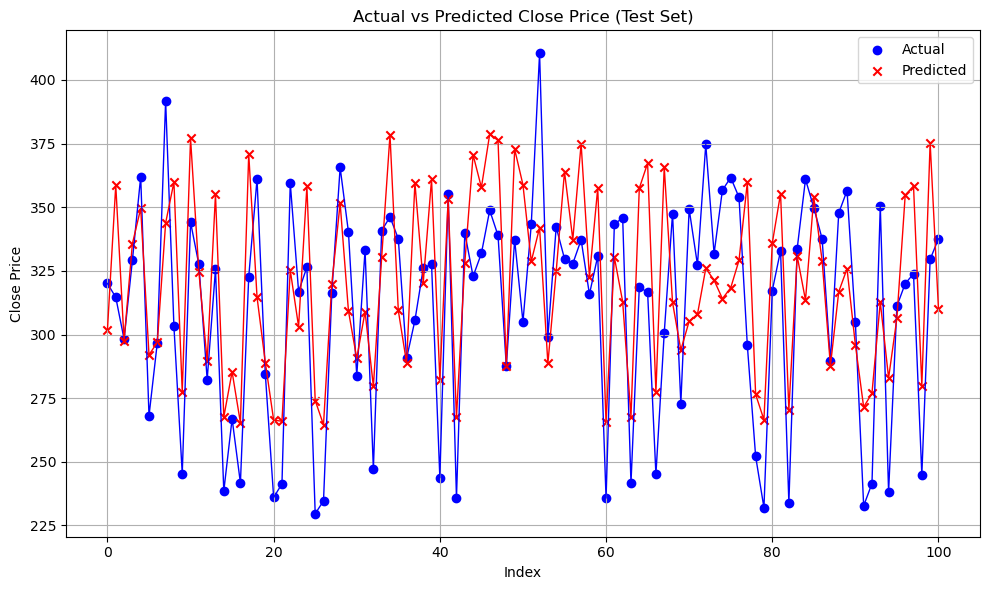

In [19]:
plt.figure(figsize=(10, 6))

# Reset the index of Y_test
Y_test_reset_index = Y_test.reset_index(drop=True)

# Plotting the actual values as scatter points
plt.scatter(Y_test_reset_index.index, Y_test_reset_index, color='blue', label='Actual', marker='o')

# Plotting the predicted values as scatter points
plt.scatter(Y_test_reset_index.index, Y_test_pred, color='red', label='Predicted', marker='x')

# Plotting the actual values as a line plot
plt.plot(Y_test_reset_index.index, Y_test_reset_index, color='blue', linestyle='-', linewidth=1)

# Plotting the predicted values as a line plot
plt.plot(Y_test_reset_index.index, Y_test_pred, color='red', linestyle='-', linewidth=1)

plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price (Test Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()